In [123]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

folder_path = Path.cwd() / "OfflinePreprocessingComparison"
results_file_path = folder_path / "OfflineValidationResults_PreprocessingComparison.csv"


In [124]:
df = pd.read_csv(str(results_file_path.absolute()), sep=";")

df.rename(columns={"S / F": "sliding_fixed", "initial left offset [ms]": "offset", "step size": "step_size"}, inplace=True)
df.columns = df.columns.str.replace(' ', '')

df["step_size"] = df['step_size'].fillna(0)

In [125]:
#grouped_df = df.groupby(["Model", "sliding_fixed", "step_size"])
#for (model, sliding_fixed, step_size), group_df in grouped_df:
#    df_melted = group_df.drop(["Model", "sliding_fixed", "step_size"], axis=1).melt(
#        id_vars=['offset'], var_name='majority_voting', value_name='values')
#
#    plt.figure()
#
#    sns.catplot(data=df_melted, x='offset', y='values', hue='majority_voting',
#                kind='bar', height=6, aspect=1.5, palette="colorblind", legend_out=False)
#
#    average_accuracy = df_melted['values'].mean()
#    highest_accuracy = df_melted['values'].max()
#
#    plt.axhline(y=average_accuracy, color='b', linestyle='--',
#                label='Average Accuracy', alpha=0.75)
#    plt.axhline(y=highest_accuracy, color='g', linestyle='--',
#                label='Highest Accuracy', alpha=0.75)
#    plt.text(3.55 if sliding_fixed == "F" else 5.6, average_accuracy, f'{average_accuracy:.2f}%',
#             color='b', fontsize=10, va='center', ha='left')
#    plt.text(3.55 if sliding_fixed == "F" else 5.6, highest_accuracy, f'{highest_accuracy:.2f}%',
#             color='g', fontsize=10, va='center', ha='left')
#
#    title = f"{model} Models, {'fixed' if sliding_fixed == 'F' else 'sliding'} window"
#    title += f", step size Δs = {int(step_size)}" if sliding_fixed == 'S' else ""
#    plt.title(title)
#
#    plt.xlabel('Offset Δo [ms]')
#
#    plt.ylabel('Accuracy [%]')
#    # plt.grid(True, axis='y', linestyle='--', alpha=0.5)
#
#    plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))
#    for text in plt.gca().get_legend().get_texts():
#        text.set_text(text.get_text().replace('SV', 'Soft Voting $N_p$ = '))
#        text.set_text(text.get_text().replace('HV', 'Hard Voting $N_p$ = '))
#
#    step_size_suffix = f"_step{int(step_size)}" if sliding_fixed == 'S' else ""
#    filename = f"{model}_{'fixed' if sliding_fixed == 'F' else 'sliding'}{step_size_suffix}.png"
#    #plt.savefig(Path.cwd() / "OfflinePreprocessingComparison" /
#                #filename, bbox_inches='tight')
#
#    plt.close()
#    plt.show()

AllModels Average Accuracy: 73.85%, Highest Accuracy: 88.99%


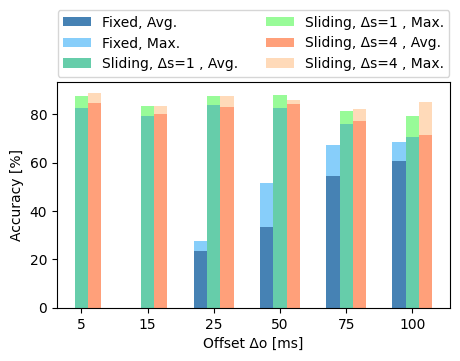

GRU Average Accuracy: 73.13%, Highest Accuracy: 88.70%


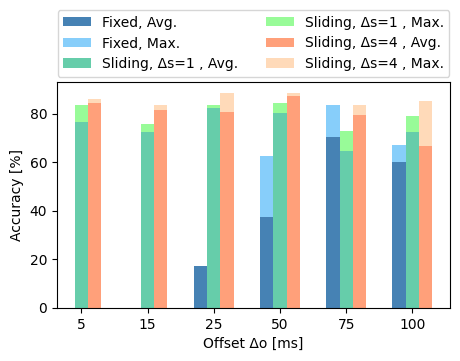

GRU Average Accuracy: 73.13%, Highest Accuracy: 88.70%


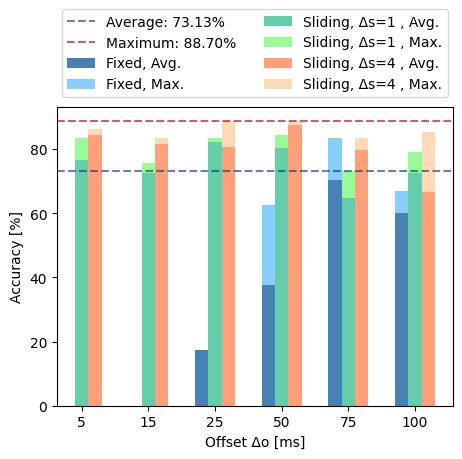

LSTM Average Accuracy: 72.20%, Highest Accuracy: 92.17%


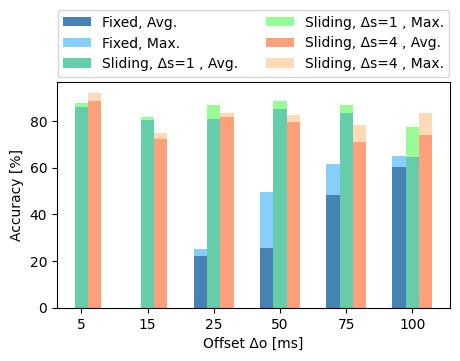

LSTM Average Accuracy: 72.20%, Highest Accuracy: 92.17%


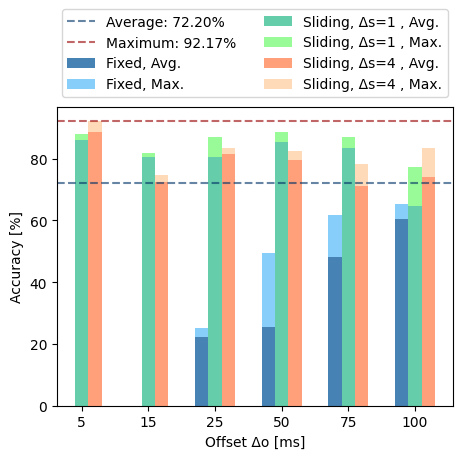

Transformer Average Accuracy: 76.22%, Highest Accuracy: 93.04%


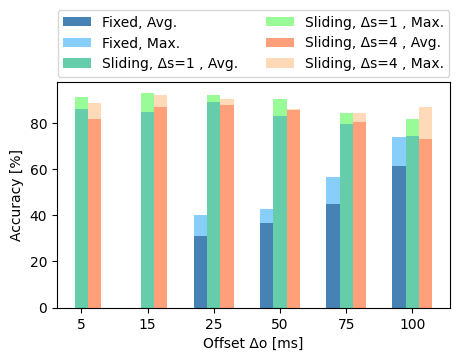

Transformer Average Accuracy: 76.22%, Highest Accuracy: 93.04%


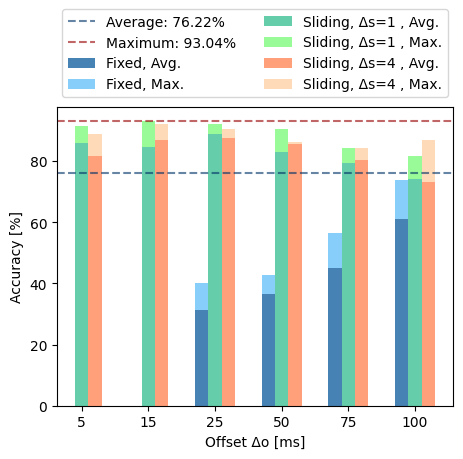

In [126]:
def plot_preprocessing_comparison(model, model_df, plot_vertical=False):
    model_df['Highest'] = model_df[['SV8', 'SV10', 'SV12',
                                    'SV15', 'HV8', 'HV10', 'HV12', 'HV15']].max(axis=1)
    model_df['Average'] = model_df[['SV8', 'SV10', 'SV12',
                                    'SV15', 'HV8', 'HV10', 'HV12', 'HV15']].mean(axis=1)

    model_df_fixed = model_df[model_df['sliding_fixed'] == 'F']
    model_df_sliding_step1 = model_df[(
        model_df['sliding_fixed'] == 'S') & (model_df['step_size'] == 1)]
    model_df_sliding_step4 = model_df[(
        model_df['sliding_fixed'] == 'S') & (model_df['step_size'] == 4)]

    model_df_grouped = pd.DataFrame({
        'offset': model_df['offset'].unique(),
        'fixed_avg': model_df_fixed.groupby('offset')['Average'].mean(),
        'fixed_highest': model_df_fixed.groupby('offset')['Highest'].mean(),
        'sliding_step1_avg': model_df_sliding_step1.groupby('offset')['Average'].mean(),
        'sliding_step1_highest': model_df_sliding_step1.groupby('offset')['Highest'].mean(),
        'sliding_step4_avg': model_df_sliding_step4.groupby('offset')['Average'].mean(),
        'sliding_step4_highest': model_df_sliding_step4.groupby('offset')['Highest'].mean(),
    })

    fig, ax = plt.subplots(figsize=(4.8, (5 if plot_vertical else 4)))
    bar_width = 0.2

    r1 = np.arange(len(model_df_grouped))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    ax.set_xlabel('Offset Δo [ms]')
    ax.set_ylabel('Accuracy [%]')
    ax.set_xticks([r + bar_width for r in range(len(model_df_grouped))])
    ax.set_xticklabels(model_df_grouped['offset'])

    ax.bar(r1, model_df_grouped['fixed_avg'], color='#4682B4',
           width=bar_width, label='Fixed Avg')
    ax.bar(r1, model_df_grouped['fixed_highest'] - model_df_grouped['fixed_avg'],
           bottom=model_df_grouped['fixed_avg'], color='#87CEFA', width=bar_width, label='Fixed Highest')

    ax.bar(r2, model_df_grouped['sliding_step1_avg'], color='#66CDAA',
           width=bar_width, label='Sliding Step 1 Avg')
    ax.bar(r2, model_df_grouped['sliding_step1_highest'] - model_df_grouped['sliding_step1_avg'],
           bottom=model_df_grouped['sliding_step1_avg'], color='#98FB98', width=bar_width, label='Sliding Step 1 Highest')

    ax.bar(r3, model_df_grouped['sliding_step4_avg'], color='#FFA07A',
           width=bar_width, label='Sliding Step 4 Avg')  # LightSalmon
    ax.bar(r3, model_df_grouped['sliding_step4_highest'] - model_df_grouped['sliding_step4_avg'],
           bottom=model_df_grouped['sliding_step4_avg'], color='#FFDAB9', width=bar_width, label='Sliding Step 4 Highest')

    flattened_values = model_df_grouped.drop(
        columns=["offset"]).values.flatten()
    flattened_values = flattened_values[~pd.isna(flattened_values)]
    average_accuracy = flattened_values.mean()
    highest_accuracy = flattened_values.max()
    print(f"{model} Average Accuracy: {average_accuracy:.2f}%, Highest Accuracy: {highest_accuracy:.2f}%")

    if plot_vertical:
        ax.axhline(average_accuracy, color='#003366', linestyle='--',
                   linewidth=1.5, alpha=0.6)
        ax.axhline(highest_accuracy, color='#990000', linestyle='--',
                   linewidth=1.5, alpha=0.6)

    ax.set_xlabel('Offset Δo [ms]')
    ax.set_ylabel('Accuracy [%]')

    # ax.set_title(
    #    f'{model} Model Accuracies, Grouped by Offset and Window Preprocessing Parameters')
    ax.set_xticks([r + bar_width for r in range(len(model_df_grouped))])
    ax.set_xticklabels(model_df_grouped['offset'])

    legend = [f'Average: {average_accuracy:.2f}%',
              f'Maximum: {highest_accuracy:.2f}%'] if plot_vertical else []
    legend += ['Fixed, Avg.', 'Fixed, Max.', 'Sliding, Δs=1 , Avg.',
               'Sliding, Δs=1 , Max.', 'Sliding, Δs=4 , Avg.', 'Sliding, Δs=4 , Max.']
    ax.legend(legend, loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=2)

    plt.tight_layout()

    suffix = f"_MaxAvg" if plot_vertical else ""
    plt.savefig(Path.cwd() / "OfflinePreprocessingComparison" /
                f"{model}_Accuracies_PreprocessingComparison{suffix}.png", bbox_inches='tight', dpi=300)

    plt.show()


plot_preprocessing_comparison("AllModels", df)
for model, model_df in df.groupby("Model"):
    plot_preprocessing_comparison(model, model_df)
    plot_preprocessing_comparison(model, model_df, plot_vertical=True)

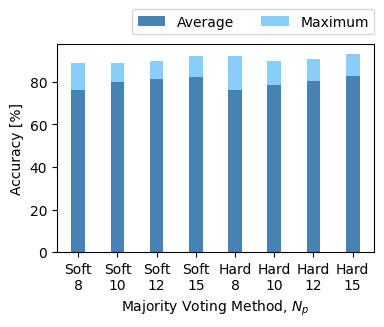

In [127]:
sliding_window_df = df[df["sliding_fixed"] == "S"]
sv_columns = [col for col in sliding_window_df.columns if col.startswith('SV')]
hv_columns = [col for col in sliding_window_df.columns if col.startswith('HV')]

sv_avg = sliding_window_df[sv_columns].mean()
sv_highest = sliding_window_df[sv_columns].max()
hv_avg = sliding_window_df[hv_columns].mean()
hv_highest = sliding_window_df[hv_columns].max()

plot_data = pd.DataFrame({
    'Column': sv_columns + hv_columns,
    'Average': list(sv_avg) + list(hv_avg),
    'Highest': list(sv_highest) + list(hv_highest)
})

fig, ax = plt.subplots(figsize=(4, 3.5))
bar_width = 0.35
index = np.arange(len(plot_data))

bars_avg = ax.bar(index, plot_data['Average'],
                  bar_width, label='Average', color='#4682B4')
bars_highest = ax.bar(index, plot_data['Highest'] - plot_data['Average'], bar_width,
                      bottom=plot_data['Average'], label='Maximum', color='#87CEFA')

ax.set_xlabel('Majority Voting Method, $N_p$')
ax.set_ylabel('Accuracy [%]')
#ax.set_title('Accuracies for Sliding Window Models, by Majority Voting Parameters')
ax.set_xticks(index)

ticklabels = [col.replace('SV', 'Soft\n').replace('HV', 'Hard\n') for col in plot_data['Column']]
ax.set_xticklabels(ticklabels)

ax.legend(loc='upper left', bbox_to_anchor=(0.215, 1.2), ncol=2)

plt.tight_layout()

plt.savefig(Path.cwd() / "OfflinePreprocessingComparison" /
                f"Accuracies_MajorityVotingComparison.png", bbox_inches='tight', dpi=300)

plt.show()